# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [1]:
#importing dependencies 
from api_keys import (weather_api_key, g_key)
from citipy import citipy
import gmaps
import json 
import numpy as np
import pandas as pd
import requests
import time
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

## Generate Cities List

In [3]:
#Generating Random coordinates
np.random.seed(47)
random_lattitudes = pd.Series(np.random.uniform(-90, 90, 1500))
np.random.seed(50)
random_longitudes = pd.Series(np.random.uniform(-180, 180, 1500))
coordinates_df = pd.concat([random_lattitudes, random_longitudes], 1)
coordinates_df.columns = ['lattitude', 'longitude']
#generate list of cities using citipy module
city_list = []
for r in range(1500):
    city = citipy.nearest_city(coordinates_df.iloc[r,0], coordinates_df.iloc[r,1]) 
    city_list.append(city.city_name)
#remove duplicates 
city_list = list(set(city_list))
#display number of cities in list
len(city_list)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Example api request
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"
City=[]
Lat=[]
Lng=[]
maximum_temp=[]
Humidity=[]
Cloudiness=[]
Windspeed=[]
Country=[]
Date=[]
count_one = 0
count_two = 1
for city in city_list: 
    response = requests.get(url + "q="+ city + "&units=imperial" + "&appid=" + weather_api_key).json()
    if response['cod'] == 200:
        City.append(city)
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon']) 
        maximum_temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Windspeed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        count_one = count_one + 1
        if count_one > 50:
            count_two = count_two + 1
            count_one = 0
        print(f'Processing record {count_one} of set {count_two} | {city}')
    else: 
        print('City not found, skipping')
    


City not found, skipping
Processing record 1 of set 1 | bonthe
Processing record 2 of set 1 | lata
Processing record 3 of set 1 | beyneu
Processing record 4 of set 1 | roros
Processing record 5 of set 1 | buritizeiro
Processing record 6 of set 1 | makakilo city
Processing record 7 of set 1 | tirau
Processing record 8 of set 1 | carroll
Processing record 9 of set 1 | vila velha
Processing record 10 of set 1 | ardesen
City not found, skipping
Processing record 11 of set 1 | los banos
Processing record 12 of set 1 | lamar
Processing record 13 of set 1 | oranjemund
Processing record 14 of set 1 | zlobin
Processing record 15 of set 1 | los llanos de aridane
Processing record 16 of set 1 | calama
Processing record 17 of set 1 | ayr
Processing record 18 of set 1 | mar del plata
Processing record 19 of set 1 | yokadouma
Processing record 20 of set 1 | dumas
Processing record 21 of set 1 | kahului
Processing record 22 of set 1 | kibala
Processing record 23 of set 1 | koutiala
Processing record 

City not found, skipping
Processing record 38 of set 4 | osakarovka
Processing record 39 of set 4 | wagar
Processing record 40 of set 4 | westport
Processing record 41 of set 4 | bethel
Processing record 42 of set 4 | arraial do cabo
Processing record 43 of set 4 | nikolsk
Processing record 44 of set 4 | chapais
Processing record 45 of set 4 | vaini
City not found, skipping
Processing record 46 of set 4 | sistranda
Processing record 47 of set 4 | aleksandrovka
Processing record 48 of set 4 | verkhnyaya inta
Processing record 49 of set 4 | khed brahma
Processing record 50 of set 4 | sajanan
Processing record 0 of set 5 | walvis bay
Processing record 1 of set 5 | tuktoyaktuk
Processing record 2 of set 5 | genhe
Processing record 3 of set 5 | gladstone
Processing record 4 of set 5 | dharmanagar
Processing record 5 of set 5 | bambous virieux
Processing record 6 of set 5 | inirida
Processing record 7 of set 5 | askino
Processing record 8 of set 5 | orlik
Processing record 9 of set 5 | texar

Processing record 22 of set 8 | sobolevo
Processing record 23 of set 8 | berdigestyakh
Processing record 24 of set 8 | alexandria
Processing record 25 of set 8 | itarema
Processing record 26 of set 8 | elko
Processing record 27 of set 8 | faanui
Processing record 28 of set 8 | kasongo-lunda
Processing record 29 of set 8 | baruun-urt
Processing record 30 of set 8 | arman
Processing record 31 of set 8 | sur
Processing record 32 of set 8 | zharkent
Processing record 33 of set 8 | tabas
Processing record 34 of set 8 | honiara
Processing record 35 of set 8 | yenagoa
Processing record 36 of set 8 | berlevag
Processing record 37 of set 8 | vaitape
Processing record 38 of set 8 | peniche
Processing record 39 of set 8 | saint-pierre
Processing record 40 of set 8 | tuatapere
Processing record 41 of set 8 | bage
Processing record 42 of set 8 | kranjska gora
Processing record 43 of set 8 | nanortalik
Processing record 44 of set 8 | murgab
Processing record 45 of set 8 | nelson bay
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
# weather_dict = {
#     "City": City,
#     "Lat": Lat, 
#     "Lng": Lng,
#     "Max Temp": maximum_temp,
#     "Humidity": Humidity,
#     "Cloudiness": Cloudiness,
#     "Windspeed": Windspeed,
#     "Country": Country,
#     "Date": Date
#     }
# weather_data = pd.DataFrame(weather_dict)
# weather_data.to_csv('../output_data/city_data.csv', index=False)
weather_data = pd.read_csv('../output_data/city_data.csv')
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,bonthe,7.53,-12.51,81.27,78,70,7.09,SL,1603475575
1,lata,40.16,-8.33,63.00,68,41,4.00,PT,1603475575
2,beyneu,45.32,55.20,40.82,65,3,9.95,KZ,1603475575
3,roros,62.57,11.38,17.60,92,0,1.12,NO,1603475575
4,buritizeiro,-17.35,-44.96,74.73,80,89,4.70,BR,1603475576


In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.057427,17.402755,60.820894,71.983577,52.120438,8.095620,1.603476e+09
std,33.695172,90.402295,21.553673,20.077039,37.072636,5.756584,6.864292e+01
min,-54.800000,-175.200000,-2.200000,11.000000,0.000000,0.290000,1.603475e+09
25%,-8.907500,-63.187500,46.300000,63.000000,17.500000,3.812500,1.603476e+09
50%,23.800000,24.155000,66.900000,76.000000,57.500000,6.930000,1.603476e+09
75%,47.870000,99.957500,77.965000,87.000000,90.000000,10.290000,1.603476e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,48.320000,1.603476e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data['Humidity'].max()
#no cities have greater than 100% humidity

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

[Text(0, 0.5, 'Max Temperature (F)'),
 Text(0.5, 0, 'Latitude'),
 Text(0.5, 1.0, 'City Latitude vs. Max Temperature')]

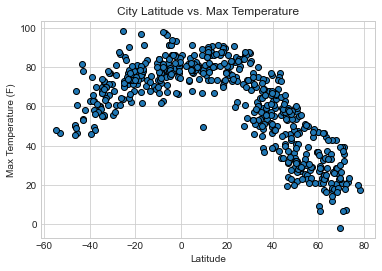

In [24]:
fig, ax = plt.subplots()
ax.scatter(weather_data['Lat'], weather_data['Max Temp'], edgecolor='black')
ax.set(title="City Latitude vs. Max Temperature", xlabel='Latitude', ylabel='Max Temperature (F)')

The maximum temperature of cities tends increase as cities get closer to the equator (0 degrees Latitude) after which they steadily drop as latitude increases above 20 degrees. 

## Latitude vs. Humidity Plot

[Text(0, 0.5, 'Humidity (%)'),
 Text(0.5, 0, 'Latitude'),
 Text(0.5, 1.0, 'City Latitude vs. Humidity')]

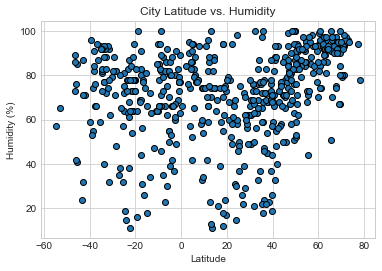

In [9]:
fig, ax = plt.subplots()
ax.scatter(weather_data['Lat'], weather_data['Humidity'], edgecolor='black')
ax.set(title="City Latitude vs. Humidity", xlabel='Latitude', ylabel='Humidity (%)')

Overall there is no clear linear relationship between the Latitude and % Humidity of cities. Cities in extremely northern Latitiudes tend to have high % humidity. 

## Latitude vs. Cloudiness Plot

[Text(0, 0.5, 'Cloudiness (%)'),
 Text(0.5, 0, 'Latitude'),
 Text(0.5, 1.0, 'City Latitude vs. Cloudiness')]

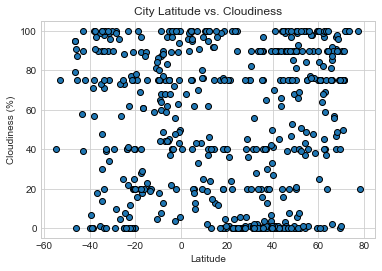

In [10]:
fig, ax = plt.subplots()
ax.scatter(weather_data['Lat'], weather_data['Cloudiness'], edgecolor='black')
ax.set(title="City Latitude vs. Cloudiness", xlabel='Latitude', ylabel='Cloudiness (%)')

Latitude doesn't seem to be directly related to determining percent cloudiness of a city. 

## Latitude vs. Wind Speed Plot

[Text(0, 0.5, 'Wind Speed (mph)'),
 Text(0.5, 0, 'Latitude'),
 Text(0.5, 1.0, 'City Latitude vs. Wind Speed')]

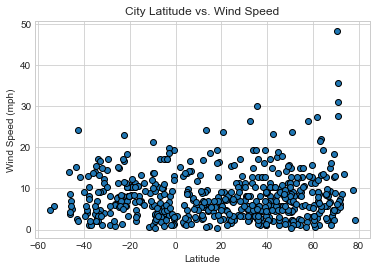

In [11]:
fig, ax = plt.subplots()
ax.scatter(weather_data['Lat'], weather_data['Windspeed'], edgecolor='black')
ax.set(title="City Latitude vs. Wind Speed", xlabel='Latitude', ylabel='Wind Speed (mph)')

There is no clear relationship between Latitude and the wind speed in a city. However, some cities at extreme ends of Latitude have pretty high windspeeds. 

## Linear Regression

In [4]:
northern_data = weather_data[weather_data['Lat']>0]
southern_data = weather_data[weather_data['Lat']<0]

In [5]:
def linregressplot(x_values, y_values, x_label, y_label): 
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(x_values, y_values, marker="o", color='b', edgecolor='black');
    ax.set(xlabel= x_label, 
           ylabel= y_label);
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    y_predicted = [slope*x + intercept for x in x_values]
    ax.plot(x_values, y_predicted, color='r');
    equation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
    ax.text((min(x_values)+10), (max(y_values)+10) , equation, fontsize=18, color='r')
    print(f'The r-value is: {rvalue}')

In [14]:
linregress(northern_data['Lat'], northern_data['Max Temp'])

LinregressResult(slope=-1.0234180898370302, intercept=95.22306567696847, rvalue=-0.8679244276063405, pvalue=7.69771646253434e-111, stderr=0.030954269954499382)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8679244276063405


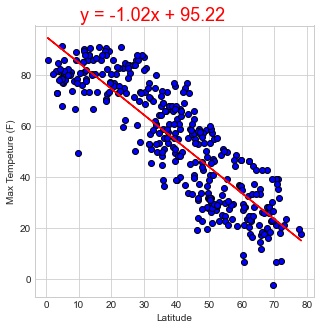

In [15]:
linregressplot(northern_data['Lat'], northern_data['Max Temp'], 'Latitude', 'Max Tempeture (F)')
linregressplot(northern_data['Lat'], northern_data['Max Temp'], 'Latitude', 'Max Tempeture (F)').savefig('../outputdata')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6688540701463697


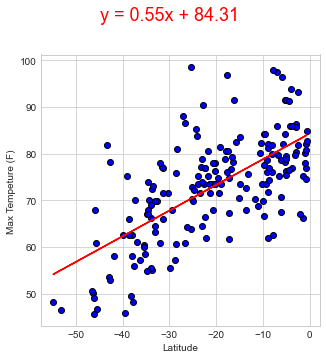

In [16]:
linregressplot(southern_data['Lat'], southern_data['Max Temp'], 'Latitude', 'Max Tempeture (F)')

#### Northern Hemishpere 
>Regression analysis of northern hemisphere **maximum temperatures** and **latitudes** of cites shows that these **negatively correlated**. That is, as latitude increases, maximum temperatures tend to decrease. This makes sense in the northern hemisphere given that as one moves up in Latitude, one moves further from the equator. The correlation coefficient (rvalue) is calculated at -0.867, showing a high degree of correlation between increasing latitude and decreasing maximim temperatures. 

#### Southern Hemisphere
>In the southern hemisphere, **maximum temperatures** and **latitude of the cites**, show fairly strong linear relationship with **positive correlation**. That is, as latitude increases, maximum temperature also increase. This makes sense given that in the southern hemisphere increasing latitude means a city is closer to equator (which is the area of earth that recieves the most direct sunlight).  The correlation coefficient (rvalue) is calculated at 0.668 showing some degree of correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4079404857442609


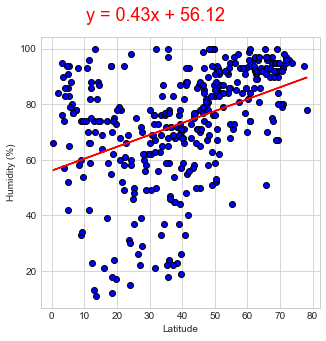

In [17]:
linregressplot(northern_data['Lat'], northern_data['Humidity'], 'Latitude', 'Humidity (%)')



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.04946307356577351


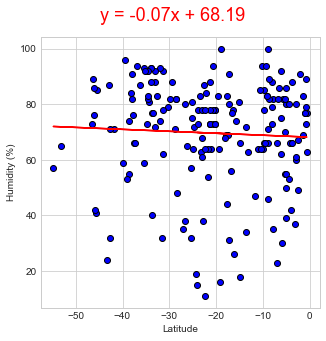

In [18]:
linregressplot(southern_data['Lat'], southern_data['Humidity'], 'Latitude', 'Humidity (%)')

#### Northern Hemishpere 
>Regression analysis of northern hemisphere cities **percent humidity** and **latitude** shows a weak **positive correlation**. As latitude increased, percent humidity tended to increase; though only sometimes (r-value 0.4)

#### Southern Hemisphere
>In the southern hemisphere, a cities **percent humidity** and **latitude**, show almost no correlation (r-value 0.04) but did have a overall **negative correlation**. As latitude increased, the overall percent humidity decreased very slightly.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18198923061064226


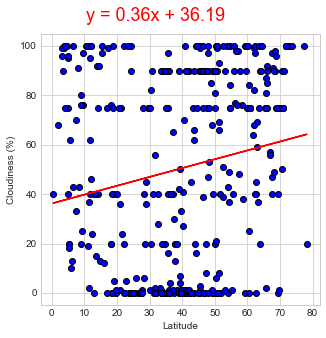

In [19]:
linregressplot(northern_data['Lat'], northern_data['Cloudiness'], 'Latitude', 'Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01552550740657869


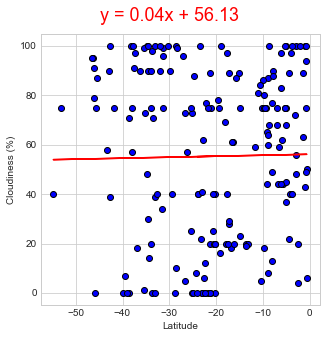

In [20]:
linregressplot(southern_data['Lat'], southern_data['Cloudiness'], 'Latitude', 'Cloudiness (%)')

#### Northern Hemishpere 
>Regression analysis of northern hemisphere cities **percent cloudiness** and **latitude** shows a weak **positive correlation** (r-value 0.18). Overall as latitude increases, percent cloudiness tends to incease very slightly for some cites. 

#### Southern Hemisphere
>Again in the southern hemisphere there is almost no correltion between, **percent cloudiness** of a city and its **latitude**.  The relationship is almost completely non-dependent (r-value 0.015). In the southern hemisphere latitude is not a good predictor of a city's cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12560534961977254


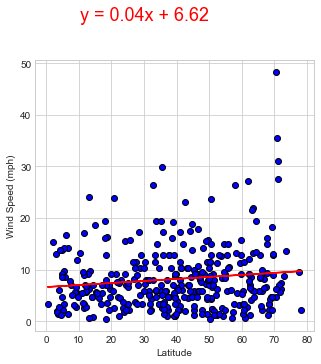

In [7]:
linregressplot(northern_data['Lat'], northern_data['Windspeed'], 'Latitude', 'Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.006506443010260225


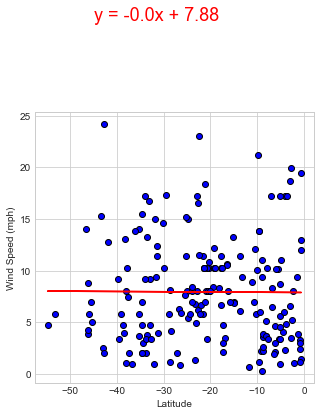

In [8]:
linregressplot(southern_data['Lat'], southern_data['Windspeed'], 'Latitude', 'Wind Speed (mph)')

#### Northern Hemisphere & Southern Hemisphere
>Regression analysis of **Latitude** vs **Windspeed** in both the northern and southern hemispheres show almost no correlation between latitude and windspeed (r-values 0.12 and -.006 respectively). Latitude and windspeed are **not very well correlated** in either hemisphere.  